Francisco Boudagh

Artifical Neural Networks - FFR135

Code for HW1 - Boolean functions 2023

In [39]:
import numpy as np
from tqdm.notebook import tqdm

In [40]:
# Generate all possible boolean functions of size 2^n
def generate_boolean_functions(n):
    # Generate all binary combinations
    boolean_inputs = np.array([[int(x) for x in format(i, '0' + str(n) + 'b')] for i in range(2**n)])
    
    # Replace 0 with -1
    boolean_inputs[boolean_inputs == 0] = -1
    
    return boolean_inputs


# This functions is to ensure to not use a boolean function that has been processed already
def has_been_processed(seen_boolean_functions, boolean_outputs):
    for used_output in seen_boolean_functions:
        if np.array_equal(used_output, boolean_outputs):
            return True
    return False


# Train perceptron
def perceptron_training(boolean_inputs, boolean_outputs, n):
    # Initialize weights with normal distribution, mean = 0, var = 1/n => std = sqrt(var)
    w = np.random.normal(0, np.sqrt(1/n), n)
    theta = 0
    
    eta = 0.05
    epochs = 20
    
    for epoch in range(epochs):
        total_error = 0
        for mu in range(2**n):
            # Activation function according to Eq. 5.9 in the book "ML with NN" by Mehlig.B
            b = np.sum(w * boolean_inputs[mu]) - theta
            g = sgn(b)
            delta_error = boolean_outputs[mu] - g

            # Update w and theta based on error according to learning rules provided in the task description
            w += eta * (boolean_outputs[mu] - g) * boolean_inputs[mu]
            theta += -eta * (boolean_outputs[mu] - g)
            total_error += abs(delta_error)

        if total_error == 0:
            return True
    return False


# Signum function
def sgn(p):
    if p >= 0:
        return 1
    else:
        return -1


# Count how many lin.sep.boolean functions there are in dimension n
def count_linearly_separable_functions(n):
    boolean_inputs = generate_boolean_functions(n)
    seen_boolean_functions = []
    counter = 0
    
    # Adding tqdm progress bar for trials
    for i in tqdm(range(10000), desc=f"Processing dimension {n}: "):
        # Generate random -1 or 1 (np.random.choice):
        boolean_outputs = np.random.choice([-1, 1], size=(2**n,))
        
        # Checks if the functions already has been processed
        if not has_been_processed(seen_boolean_functions, boolean_outputs):
            # If the perceptron (after trained) can correctly classify every input then true and +1
            if perceptron_training(boolean_inputs, boolean_outputs, n):
                counter += 1
                
            # Add current boolean output to the list of processed
            seen_boolean_functions.append(boolean_outputs)
    
    return counter

In [41]:
dimensions = [2, 3, 4, 5]

for dimension in dimensions:
    counter = count_linearly_separable_functions(dimension)
    print(f'In dimension {dimension} there are {counter} linearly separable boolean functions. \n')

Processing dimension 2:   0%|          | 0/10000 [00:00<?, ?it/s]

In dimension 2 there are 14 linearly separable boolean functions. 



Processing dimension 3:   0%|          | 0/10000 [00:00<?, ?it/s]

In dimension 3 there are 104 linearly separable boolean functions. 



Processing dimension 4:   0%|          | 0/10000 [00:00<?, ?it/s]

In dimension 4 there are 254 linearly separable boolean functions. 



Processing dimension 5:   0%|          | 0/10000 [00:00<?, ?it/s]

In dimension 5 there are 0 linearly separable boolean functions. 



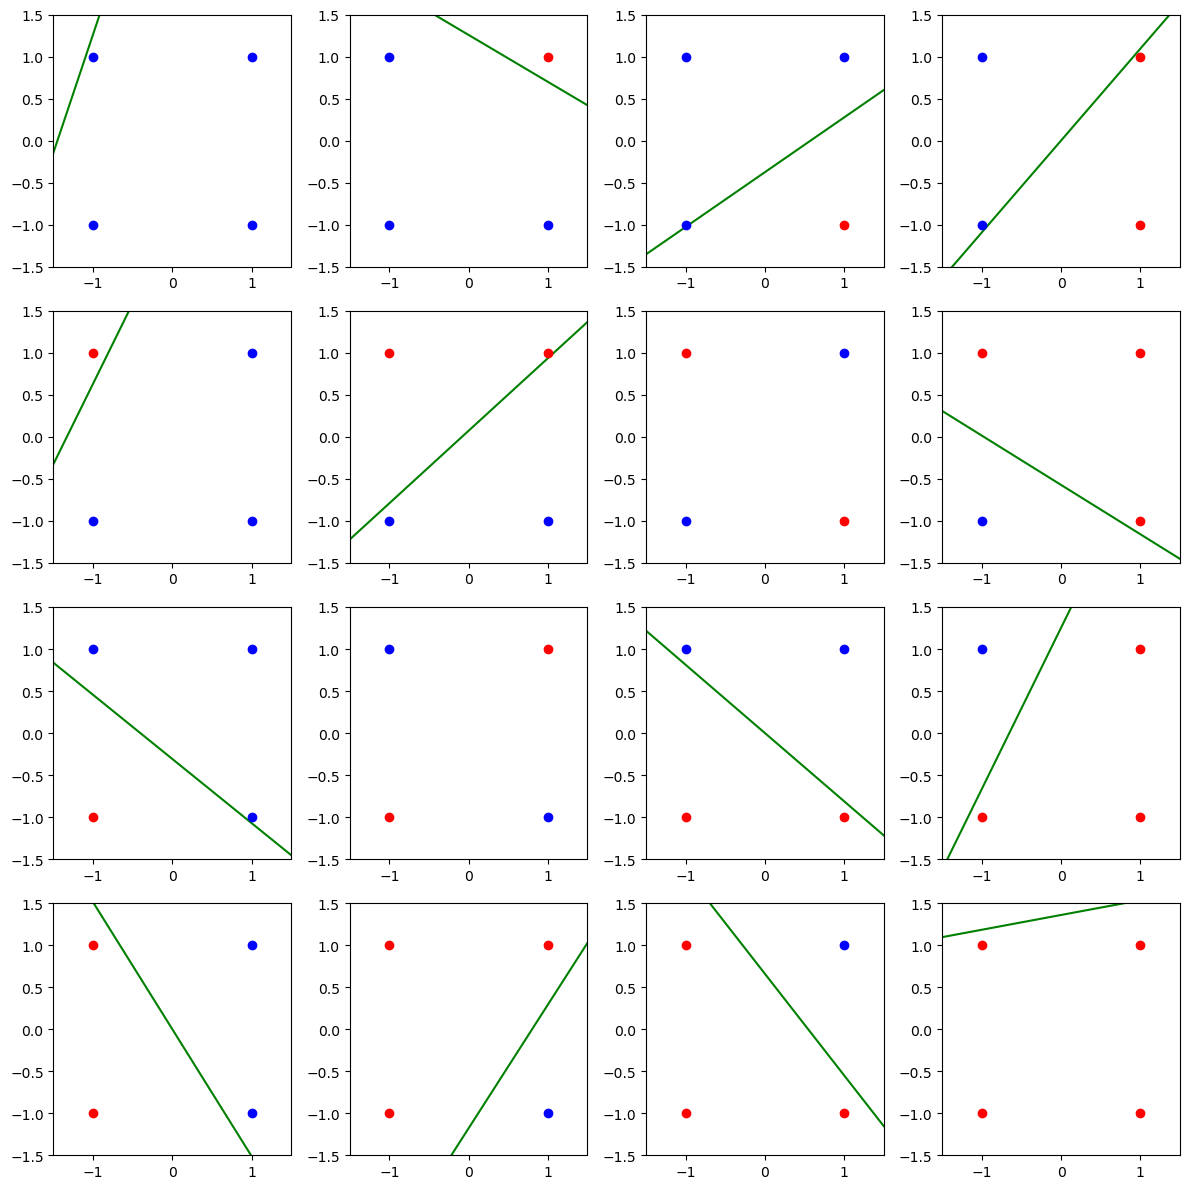

In [42]:
# This part is only of curiostiy and to visually verify that the program is doing the correct task
# This is not a requested part of the task
import matplotlib.pyplot as plt

def plot_boolean_functions():
    boolean_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
    total_functions = 2**4

    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    
    for idx, ax in enumerate(axes.ravel()):
        boolean_outputs = np.array([(1 if int(x) else -1) for x in format(idx, '04b')])
        
        # If true
        if perceptron_training(boolean_inputs, boolean_outputs, 2):
            w = np.random.normal(0, 1, 2)
            theta = 0
            eta = 0.05
            for epoch in range(20):
                for mu, inp in enumerate(boolean_inputs):
                    b = np.sum(w * inp) - theta
                    g = sgn(b)
                    delta_error = boolean_outputs[mu] - g
                    w += eta * delta_error * inp
                    theta -= eta * delta_error
                    
            # Plot line equation:
            ax.plot([-1.5, 1.5], [(-w[0]*x + theta)/w[1] for x in [-1.5, 1.5]], '-g')

        for point, out in zip(boolean_inputs, boolean_outputs):
            if out == 1:
                color = 'ro'
            else:
                color = 'bo'
            ax.plot(point[0], point[1], color)
        ax.set_xlim([-1.5, 1.5])
        ax.set_ylim([-1.5, 1.5])

    plt.tight_layout()
    plt.show()

plot_boolean_functions()

As one can see, there are only 2 plots out of 16 that don't have a "separation line". This is just like the result we got above, 14/16 linearly separable boolean functions in dimension 2.